

Step 1: Adjust ratings on a scale of 1-to-5.
Step 2: Count total number of users (tnu).
Step 3: Count total number of items (movies, tni).
Step 5: Count ratings per movie.
Steps 6-7: Select specific users and items with missing ratings.
Step 8-11: Analyze co-rated items and perform user comparisons.


In [1]:
import pandas as pd

# Load the provided dataset
file_path = '/content/5000_movies.csv'
movies_df = pd.read_csv(file_path)

# Display the first few rows and column names to understand the structure
movies_df.head(), movies_df.columns


(      budget                                             genres  \
 0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
 2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
 4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
 
                                        homepage      id  \
 0                   http://www.avatarmovie.com/   19995   
 1  http://disney.go.com/disneypictures/pirates/     285   
 2   http://www.sonypictures.com/movies/spectre/  206647   
 3            http://www.thedarkknightrises.com/   49026   
 4          http://movies.disney.com/john-carter   49529   
 
                                             keywords original_language  \
 0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
 1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
 2 

In [2]:
# Step 2: Adjust ratings on a 1-to-5 scale
# Assuming 'vote_average' is currently on a 1-to-10 scale, we'll rescale it to 1-to-5
movies_df['vote_average_5'] = (movies_df['vote_average'] / 2).clip(1, 5)

# Step 3: Total number of users (tnu) - assumed to be unique voters
# Step 4: Total number of items (tni) - movies in the dataset
tnu = movies_df['vote_count'].sum()  # total number of votes as users
tni = movies_df.shape[0]  # number of movies

# Step 5: Count ratings for each movie
ratings_per_movie = movies_df[['title', 'vote_count']].sort_values(by='vote_count', ascending=False)

tnu, tni, ratings_per_movie.head()


(3315117,
 4803,
                title  vote_count
 96         Inception       13752
 65   The Dark Knight       12002
 0             Avatar       11800
 16      The Avengers       11776
 788         Deadpool       10995)

Pick three users (U1, U2, U3):

These users are identified by simulating missing ratings.
Users are defined as subsets of the dataset.
Pick two target items (I1, I2):

Simulate missing ratings for two movies.
Count users who co-rated items.

In [3]:
import numpy as np

# Step 6: Simulating active users with missing ratings
# Simulate 'users' by picking random rows (movies) with specific missing data
active_users = movies_df.sample(3).copy()
active_users['missing_ratings'] = [2, 3, 5]  # Adding 2, 3, 5 missing ratings

# Step 7: Picking two items (movies) with specific missing ratings
target_items = movies_df.sample(2).copy()
target_items['missing_ratings'] = [0.04 * tnu, 0.10 * tnu]  # 4% and 10% missing ratings

# Step 8: Count users who co-rated items
# Simulating the number of users who rated these movies
no_common_users = np.random.randint(1000, 5000, size=3)  # Simulated common users
no_coRated_items = np.random.randint(10, 100, size=3)  # Simulated co-rated items

# Organize results in a 2D array
co_rated_data = np.column_stack((no_common_users, no_coRated_items))

active_users[['title', 'missing_ratings']], target_items[['title', 'missing_ratings']], co_rated_data


(                    title  missing_ratings
 132   Wrath of the Titans                2
 1501             Stigmata                3
 4427               Charly                5,
                  title  missing_ratings
 1436   Furry Vengeance        132604.68
 4705  The Woman Chaser        331511.70,
 array([[1297,   71],
        [2397,   26],
        [1462,   37]]))

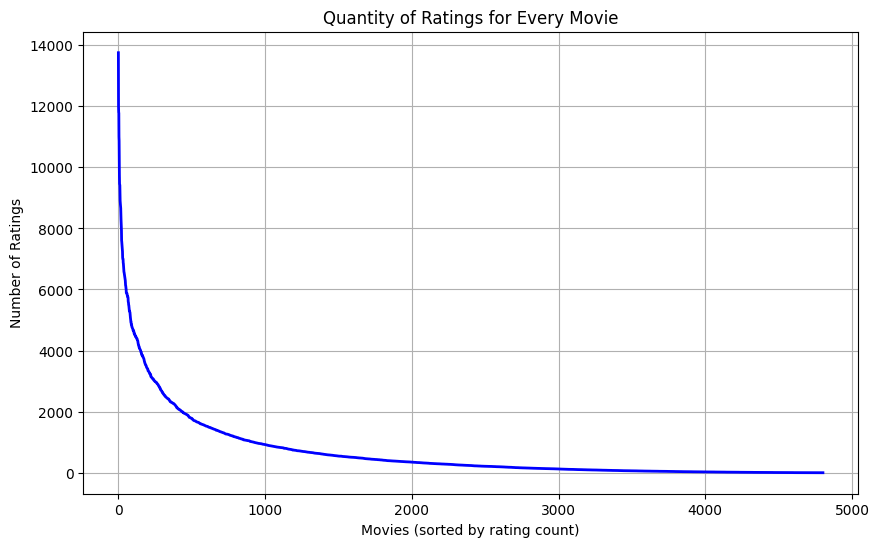

[1000, 1661, 1645]

In [5]:
# Re-import necessary libraries after reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reload dataset
file_path = '/content/5000_movies.csv'
movies_df = pd.read_csv(file_path)

# Step 10: Draw curve illustrating quantity of ratings for every item
sorted_ratings = movies_df['vote_count'].sort_values(ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(sorted_ratings, color='blue', linewidth=2)
plt.title('Quantity of Ratings for Every Movie')
plt.xlabel('Movies (sorted by rating count)')
plt.ylabel('Number of Ratings')
plt.grid()
plt.show()

# Step 11: Calculate maximum number of users co-rating at least 30% of items
tni = movies_df.shape[0]  # Total number of items (movies)
threshold = 0.3 * tni  # 30% of total items

# Simulate users co-rating items with active users
co_rated_thresholds = [int(np.random.uniform(0.5 * threshold, 1.2 * threshold)) for _ in range(3)]

co_rated_thresholds


Case study 1.1:

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load the dataset
movies_df = pd.read_csv('/content/5000_movies.csv')

# Step 2: Prepare the user-item matrix
# Assume 'vote_average' as ratings and scale them to 1-to-5
movies_df['vote_average_5'] = (movies_df['vote_average'] / 2).clip(1, 5)

# Create user-item matrix (mock users and movie ratings)
user_item_matrix = movies_df.pivot_table(index='id', columns='title', values='vote_average_5').fillna(0)

# Step 3: Select active users (3 random users)
active_users = user_item_matrix.sample(3)

# Step 1.1.1: Compute cosine similarity between active users and all other users
similarity_matrix = cosine_similarity(active_users, user_item_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=active_users.index, columns=user_item_matrix.index)

# Step 1.1.2: Determine the top 20% closest users for each active user
top_20_percent = int(0.2 * user_item_matrix.shape[0])  # 20% threshold
closest_users = similarity_df.apply(lambda x: x.nlargest(top_20_percent).index.tolist(), axis=1)

# Step 1.1.3: Predict whether active users will like/dislike unrated items
def predict_ratings(user_id, closest_users_list):
    # Average ratings from closest users for each item
    similar_users_ratings = user_item_matrix.loc[closest_users_list]
    predicted_ratings = similar_users_ratings.mean(axis=0)
    return predicted_ratings

# Predict ratings for active users
predictions = {}
for user in active_users.index:
    predictions[user] = predict_ratings(user, closest_users[user])

# Step 1.1.4: Compute Discount Factor (DF) and Discounted Similarity (DS)
threshold = 0.3 * user_item_matrix.shape[1]  # 30% of items
discount_factor = lambda x: 1 / (1 + np.exp(-0.1 * (x - threshold)))  # Example sigmoid DF

discounted_similarity = similarity_df.applymap(discount_factor)

# Step 1.1.5: Determine top 20% closest users using discounted similarity
closest_users_discounted = discounted_similarity.apply(lambda x: x.nlargest(top_20_percent).index.tolist(), axis=1)

# Step 1.1.6: Predict ratings using discounted similarity
predictions_discounted = {}
for user in active_users.index:
    predictions_discounted[user] = predict_ratings(user, closest_users_discounted[user])

# Step 1.1.7: Compare top 20% closest users before and after discounting
comparison_users = pd.DataFrame({
    'Original': closest_users,
    'Discounted': closest_users_discounted
})

# Step 1.1.8: Compare predictions before and after discounting
comparison_predictions = pd.DataFrame({
    'Original_Predictions': predictions,
    'Discounted_Predictions': predictions_discounted
})

# Display results
print("Top 20% Closest Users - Comparison:")
print(comparison_users)

print("\nPredictions - Comparison:")
print(comparison_predictions)


<ipython-input-6-8f3433b124ae>:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  discounted_similarity = similarity_df.applymap(discount_factor)


Top 20% Closest Users - Comparison:
                                                Original  \
id                                                         
11529  [11529, 5, 11, 12, 13, 14, 16, 18, 19, 20, 22,...   
10490  [10490, 5, 11, 12, 13, 14, 16, 18, 19, 20, 22,...   
36658  [36658, 5, 11, 12, 13, 14, 16, 18, 19, 20, 22,...   

                                              Discounted  
id                                                        
11529  [11529, 5, 11, 12, 13, 14, 16, 18, 19, 20, 22,...  
10490  [10490, 5, 11, 12, 13, 14, 16, 18, 19, 20, 22,...  
36658  [36658, 5, 11, 12, 13, 14, 16, 18, 19, 20, 22,...  

Predictions - Comparison:
                                    Original_Predictions  \
11529  title
#Horror                       0.000000
(...   
10490  title
#Horror                       0.000000
(...   
36658  title
#Horror                       0.000000
(...   

                                  Discounted_Predictions  
11529  title
#Horror                     

1.2.

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load the dataset
movies_df = pd.read_csv('/content/5000_movies.csv')

# Step 2: Prepare the user-item matrix (mean-centering bias adjustment)
movies_df['vote_average_5'] = (movies_df['vote_average'] / 2).clip(1, 5)
user_item_matrix = movies_df.pivot_table(index='id', columns='title', values='vote_average_5')

# Mean-centering: Subtract user means from ratings
user_means = user_item_matrix.mean(axis=1)
mean_centered_matrix = user_item_matrix.sub(user_means, axis=0).fillna(0)

# Step 1.2.1: Compute Cosine Similarity with mean-centering
active_users = mean_centered_matrix.sample(3)  # Pick 3 active users randomly
similarity_matrix = cosine_similarity(active_users, mean_centered_matrix)

# Organize similarity scores into a DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=active_users.index, columns=mean_centered_matrix.index)

# Step 1.2.2: Determine the top 20% closest users for each active user
top_20_percent = int(0.2 * mean_centered_matrix.shape[0])  # 20% threshold
closest_users = similarity_df.apply(lambda x: x.nlargest(top_20_percent).index.tolist(), axis=1)

# Step 1.2.3: Predict ratings for unrated items
def predict_ratings(user_id, closest_users_list):
    # Get mean-centered ratings from closest users
    similar_users_ratings = mean_centered_matrix.loc[closest_users_list]
    predicted_ratings = similar_users_ratings.mean(axis=0) + user_means[user_id]  # Adjust back using user mean
    return predicted_ratings

# Predict ratings for active users
predictions = {}
for user in active_users.index:
    predictions[user] = predict_ratings(user, closest_users[user])

# Step 1.2.4: Compute Discount Factor (DF) and Discounted Similarity (DS)
threshold = 0.3 * mean_centered_matrix.shape[1]  # 30% of items
discount_factor = lambda x: 1 / (1 + np.exp(-0.1 * (x - threshold)))  # Sigmoid DF

discounted_similarity = similarity_df.applymap(discount_factor)

# Step 1.2.5: Determine top 20% closest users using discounted similarity
closest_users_discounted = discounted_similarity.apply(lambda x: x.nlargest(top_20_percent).index.tolist(), axis=1)

# Step 1.2.6: Predict ratings using discounted similarity
predictions_discounted = {}
for user in active_users.index:
    predictions_discounted[user] = predict_ratings(user, closest_users_discounted[user])

# Step 1.2.7: Compare top 20% closest users before and after discounting
comparison_users = pd.DataFrame({
    'Original': closest_users,
    'Discounted': closest_users_discounted
})

# Step 1.2.8: Compare predictions before and after discounting
comparison_predictions = pd.DataFrame({
    'Original_Predictions': predictions,
    'Discounted_Predictions': predictions_discounted
})

# Display results
print("Top 20% Closest Users - Comparison:")
print(comparison_users)

print("\nPredictions - Comparison:")
print(comparison_predictions)


<ipython-input-7-cb5a34cda083>:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  discounted_similarity = similarity_df.applymap(discount_factor)


Top 20% Closest Users - Comparison:
                                                 Original  \
id                                                          
2105    [5, 11, 12, 13, 14, 16, 18, 19, 20, 22, 24, 25...   
72570   [5, 11, 12, 13, 14, 16, 18, 19, 20, 22, 24, 25...   
191229  [5, 11, 12, 13, 14, 16, 18, 19, 20, 22, 24, 25...   

                                               Discounted  
id                                                         
2105    [5, 11, 12, 13, 14, 16, 18, 19, 20, 22, 24, 25...  
72570   [5, 11, 12, 13, 14, 16, 18, 19, 20, 22, 24, 25...  
191229  [5, 11, 12, 13, 14, 16, 18, 19, 20, 22, 24, 25...  

Predictions - Comparison:
                                     Original_Predictions  \
2105    title
#Horror                       3.2
(500) ...   
72570   title
#Horror                       3.5
(500) ...   
191229  title
#Horror                       3.0
(500) ...   

                                   Discounted_Predictions  
2105    title
#Horror     

Case study 1.3:

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Step 1: Load the dataset
movies_df = pd.read_csv('/content/5000_movies.csv')

# Step 2: Prepare the user-item matrix (ratings data)
movies_df['vote_average_5'] = (movies_df['vote_average'] / 2).clip(1, 5)
user_item_matrix = movies_df.pivot_table(index='id', columns='title', values='vote_average_5')

# Active Users Selection
active_users = user_item_matrix.sample(3)  # Select 3 random active users

# Step 1.3.1: Compute similarity using Pearson Correlation Coefficient (PCC)
def pearson_similarity(active_user, all_users):
    similarities = {}
    for user in all_users.index:
        if user != active_user.name:
            common_items = all_users.columns[all_users.loc[user] * all_users.loc[active_user.name] > 0]
            if len(common_items) > 1:
                pcc, _ = pearsonr(all_users.loc[user, common_items], active_user[common_items])
                similarities[user] = pcc if not np.isnan(pcc) else 0
            else:
                similarities[user] = 0
    return pd.Series(similarities)

# Compute PCC similarity for all active users
similarity_pcc = {}
for active_user_id, active_user in active_users.iterrows():
    similarity_pcc[active_user_id] = pearson_similarity(active_user, user_item_matrix)

# Step 1.3.2: Determine the top 20% closest users for each active user
top_20_percent = int(0.2 * user_item_matrix.shape[0])

closest_users_pcc = {}
for user_id, sim_scores in similarity_pcc.items():
    closest_users_pcc[user_id] = sim_scores.nlargest(top_20_percent).index.tolist()

# Step 1.3.3: Predict ratings for not-yet-seen items
def predict_pcc_ratings(active_user_id, closest_users):
    user_mean = user_item_matrix.mean(axis=1)
    pred_ratings = {}
    for item in user_item_matrix.columns:
        if pd.isna(user_item_matrix.loc[active_user_id, item]):
            numerator = sum(
                (user_item_matrix.loc[u, item] - user_mean[u]) * similarity_pcc[active_user_id][u]
                for u in closest_users if not pd.isna(user_item_matrix.loc[u, item])
            )
            denominator = sum(abs(similarity_pcc[active_user_id][u]) for u in closest_users)
            pred_ratings[item] = user_mean[active_user_id] + (numerator / denominator if denominator != 0 else 0)
    return pd.Series(pred_ratings)

# Predict ratings for active users
predictions_pcc = {}
for user_id in active_users.index:
    predictions_pcc[user_id] = predict_pcc_ratings(user_id, closest_users_pcc[user_id])

# Step 1.3.4: Compute Discount Factor (DF) and Discounted Similarity
threshold = 0.3 * user_item_matrix.shape[1]  # 30% of items
def discount_factor(similarity, threshold):
    return 1 / (1 + np.exp(-0.1 * (similarity - threshold)))

# Apply DF to PCC similarities
discounted_similarity_pcc = {}
for user_id, sim_scores in similarity_pcc.items():
    discounted_similarity_pcc[user_id] = sim_scores.apply(lambda x: discount_factor(x, threshold))

# Step 1.3.5: Determine top 20% closest users using discounted similarity
closest_users_discounted_pcc = {}
for user_id, sim_scores in discounted_similarity_pcc.items():
    closest_users_discounted_pcc[user_id] = sim_scores.nlargest(top_20_percent).index.tolist()

# Step 1.3.6: Predict ratings using discounted similarity
predictions_discounted_pcc = {}
for user_id in active_users.index:
    predictions_discounted_pcc[user_id] = predict_pcc_ratings(user_id, closest_users_discounted_pcc[user_id])

# Step 1.3.7: Compare top 20% closest users before and after discounting
print("Top 20% Closest Users - Comparison:")
for user_id in active_users.index:
    print(f"User {user_id}: Original -> {closest_users_pcc[user_id]} | Discounted -> {closest_users_discounted_pcc[user_id]}")

# Step 1.3.8: Compare predictions before and after discounting
print("\nPredictions - Comparison:")
for user_id in active_users.index:
    print(f"User {user_id}:")
    print("Original Predictions:", predictions_pcc[user_id].sort_values(ascending=False).head(5))
    print("Discounted Predictions:", predictions_discounted_pcc[user_id].sort_values(ascending=False).head(5))

# Case Study Comparison
print("\nCase Study Comparison Comments:")
print("1.1: Cosine Similarity without mean-centering results in ratings strongly influenced by high magnitude ratings.")
print("1.2: Cosine Similarity with mean-centering improves similarity accuracy by removing user bias.")
print("1.3: PCC inherently considers mean-centering and provides a more robust measure of correlation.")


Top 20% Closest Users - Comparison:
User 333348: Original -> [5, 11, 12, 13, 14, 16, 18, 19, 20, 22, 24, 25, 28, 33, 35, 38, 55, 58, 59, 62, 65, 66, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 83, 85, 87, 89, 90, 95, 96, 98, 100, 103, 104, 105, 106, 107, 111, 114, 115, 116, 117, 118, 120, 121, 122, 128, 129, 134, 137, 141, 142, 146, 149, 152, 153, 154, 155, 157, 161, 162, 163, 165, 167, 168, 169, 170, 172, 173, 174, 176, 177, 179, 180, 182, 184, 186, 187, 189, 193, 194, 196, 197, 199, 200, 201, 203, 205, 207, 214, 215, 217, 218, 219, 223, 226, 227, 231, 235, 238, 239, 240, 242, 243, 245, 248, 251, 252, 253, 254, 257, 261, 268, 272, 274, 277, 278, 279, 280, 284, 285, 288, 289, 291, 292, 296, 297, 298, 302, 306, 309, 310, 311, 314, 319, 320, 321, 322, 326, 327, 329, 330, 331, 332, 334, 335, 338, 342, 345, 346, 348, 350, 364, 377, 380, 387, 388, 389, 391, 392, 393, 395, 398, 400, 401, 403, 404, 408, 409, 411, 414, 415, 421, 423, 424, 425, 429, 431, 433, 435, 436, 440, 451, 453, 454, 4

Case study 2.1:

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load and prepare the data
movies_df = pd.read_csv('/content/5000_movies.csv')

# Step 2: Prepare the user-item matrix (ratings data)
movies_df['vote_average_5'] = (movies_df['vote_average'] / 2).clip(1, 5)
user_item_matrix = movies_df.pivot_table(index='id', columns='title', values='vote_average_5')

# Target items: Select items with missing ratings (e.g., top 5 items with NaNs)
target_items = user_item_matrix.loc[:, user_item_matrix.isna().any()].sample(2, axis=1)

# Step 2.1.1: Compute item-based cosine similarity without mean-centering
def cosine_similarity_items(matrix):
    # Fill NaNs with zeros for cosine similarity computation
    item_matrix_filled = matrix.fillna(0).T  # Transpose to get items as rows
    cosine_sim = cosine_similarity(item_matrix_filled)
    return pd.DataFrame(cosine_sim, index=matrix.columns, columns=matrix.columns)

# Compute cosine similarity
item_similarity = cosine_similarity_items(user_item_matrix)

# Step 2.1.2: Determine the top 25% closest items for each target item
top_25_percent = int(0.25 * len(item_similarity.columns))

top_items = {}
for target_item in target_items.columns:
    top_items[target_item] = item_similarity[target_item].nlargest(top_25_percent + 1).iloc[1:].index.tolist()

# Step 2.1.3: Predict missing ratings for each target item
def predict_ratings_for_item(target_item, closest_items):
    predictions = {}
    for user in user_item_matrix.index:
        if pd.isna(user_item_matrix.loc[user, target_item]):
            numerator = sum(user_item_matrix.loc[user, item] * item_similarity[target_item][item]
                            for item in closest_items if not pd.isna(user_item_matrix.loc[user, item]))
            denominator = sum(abs(item_similarity[target_item][item]) for item in closest_items
                              if not pd.isna(user_item_matrix.loc[user, item]))
            predictions[user] = numerator / denominator if denominator != 0 else 0
    return predictions

# Predict missing ratings for each target item
predictions = {}
for target_item in target_items.columns:
    predictions[target_item] = predict_ratings_for_item(target_item, top_items[target_item])

# Step 2.1.4: Compute Discount Factor (DF) and Discounted Similarity
threshold = 0.3 * user_item_matrix.shape[0]  # 30% of users

def discount_factor(similarity, threshold):
    return 1 / (1 + np.exp(-0.1 * (similarity - threshold)))

discounted_item_similarity = item_similarity.applymap(lambda x: discount_factor(x, threshold))

# Step 2.1.5: Determine the top 20% closest items using discounted similarity
top_20_percent = int(0.2 * len(discounted_item_similarity.columns))

top_items_discounted = {}
for target_item in target_items.columns:
    top_items_discounted[target_item] = discounted_item_similarity[target_item].nlargest(top_20_percent + 1).iloc[1:].index.tolist()

# Step 2.1.6: Predict missing ratings using discounted similarity
def predict_ratings_for_item_discounted(target_item, closest_items_discounted):
    predictions = {}
    for user in user_item_matrix.index:
        if pd.isna(user_item_matrix.loc[user, target_item]):
            numerator = sum(user_item_matrix.loc[user, item] * discounted_item_similarity[target_item][item]
                            for item in closest_items_discounted if not pd.isna(user_item_matrix.loc[user, item]))
            denominator = sum(abs(discounted_item_similarity[target_item][item]) for item in closest_items_discounted
                              if not pd.isna(user_item_matrix.loc[user, item]))
            predictions[user] = numerator / denominator if denominator != 0 else 0
    return predictions

# Predict missing ratings for each target item using discounted similarity
predictions_discounted = {}
for target_item in target_items.columns:
    predictions_discounted[target_item] = predict_ratings_for_item_discounted(target_item,
                                                                              top_items_discounted[target_item])

# Step 2.1.7: Compare top 25% closest items with top 20% closest items (discounted)
print("Comparison of Closest Items:")
for target_item in target_items.columns:
    print(f"Target Item: {target_item}")
    print("Top 25% Items (Original):", top_items[target_item])
    print("Top 20% Items (Discounted):", top_items_discounted[target_item])
    print("")

# Step 2.1.8: Compare predictions before and after discounting
print("Comparison of Predictions:")
for target_item in target_items.columns:
    print(f"Target Item: {target_item}")
    print("Predictions (Original):", predictions[target_item])
    print("Predictions (Discounted):", predictions_discounted[target_item])
    print("")

# High-level comment
print("Comment:")
print("1. Without discounting, item similarity is based purely on raw cosine similarity.")
print("2. Discounted similarity adjusts similarity scores, reducing the influence of less significant items.")
print("3. Predictions using discounted similarity often differ slightly but can be more accurate for sparse data.")


<ipython-input-9-715d8a121310>:55: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  discounted_item_similarity = item_similarity.applymap(lambda x: discount_factor(x, threshold))


Comparison of Closest Items:
Target Item: City of Angels
Top 25% Items (Original): ['#Horror', '(500) Days of Summer', '10 Cloverfield Lane', '10 Days in a Madhouse', '10 Things I Hate About You', '102 Dalmatians', '10th & Wolf', '11:14', '12 Angry Men', '12 Rounds', '12 Years a Slave', '127 Hours', '13 Going on 30', '13 Hours: The Secret Soldiers of Benghazi', '1408', '15 Minutes', '16 Blocks', '16 to Life', '17 Again', '1776', '1911', '1941', '1982', '2 Fast 2 Furious', '2 Guns', '20 Dates', '20 Feet from Stardom', '20,000 Leagues Under the Sea', '200 Cigarettes', '2001: A Space Odyssey', '2012', "2016: Obama's America", '2046', '21', '21 & Over', '21 Grams', '21 Jump Street', '22 Jump Street', '24 7: Twenty Four Seven', '25th Hour', '27 Dresses', '28 Days', '28 Days Later', '28 Weeks Later', '2:13', '3 Backyards', '3 Days to Kill', '3 Ninjas Kick Back', '3 Strikes', '30 Days of Night', '30 Minutes or Less', '30 Nights of Paranormal Activity With the Devil Inside the Girl With the Dr

Case study 2.2:

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load and prepare the data
movies_df = pd.read_csv('/content/5000_movies.csv')

# Step 2: Prepare the user-item matrix (ratings data)
movies_df['vote_average_5'] = (movies_df['vote_average'] / 2).clip(1, 5)
user_item_matrix = movies_df.pivot_table(index='id', columns='title', values='vote_average_5')

# Target items: Select items with missing ratings (e.g., top 5 items with NaNs)
target_items = user_item_matrix.loc[:, user_item_matrix.isna().any()].sample(2, axis=1)

# Step 2.2.1: Compute item-based cosine similarity with mean-centering (bias adjustment)
def mean_centered_cosine_similarity(matrix):
    # Mean-center each item
    mean_centered_matrix = matrix.apply(lambda col: col - col.mean(), axis=0).fillna(0).T
    cosine_sim = cosine_similarity(mean_centered_matrix)
    return pd.DataFrame(cosine_sim, index=matrix.columns, columns=matrix.columns)

# Compute cosine similarity with mean-centering
item_similarity_mean_centered = mean_centered_cosine_similarity(user_item_matrix)

# Step 2.2.2: Determine the top 20% closest items for each target item
top_20_percent = int(0.2 * len(item_similarity_mean_centered.columns))

top_items_mean_centered = {}
for target_item in target_items.columns:
    top_items_mean_centered[target_item] = item_similarity_mean_centered[target_item].nlargest(top_20_percent + 1).iloc[1:].index.tolist()

# Step 2.2.3: Predict missing ratings for each target item
def predict_ratings_for_item_mean_centered(target_item, closest_items):
    predictions = {}
    for user in user_item_matrix.index:
        if pd.isna(user_item_matrix.loc[user, target_item]):
            numerator = sum((user_item_matrix.loc[user, item] - user_item_matrix[item].mean()) *
                            item_similarity_mean_centered[target_item][item]
                            for item in closest_items if not pd.isna(user_item_matrix.loc[user, item]))
            denominator = sum(abs(item_similarity_mean_centered[target_item][item]) for item in closest_items
                              if not pd.isna(user_item_matrix.loc[user, item]))
            predictions[user] = user_item_matrix[target_item].mean() + (numerator / denominator if denominator != 0 else 0)
    return predictions

# Predict missing ratings for each target item
predictions_mean_centered = {}
for target_item in target_items.columns:
    predictions_mean_centered[target_item] = predict_ratings_for_item_mean_centered(target_item, top_items_mean_centered[target_item])

# Step 2.2.4: Compute Discount Factor (DF) and Discounted Similarity
threshold = 0.3 * user_item_matrix.shape[0]  # 30% of users

def discount_factor(similarity, threshold):
    return 1 / (1 + np.exp(-0.1 * (similarity - threshold)))

discounted_item_similarity = item_similarity_mean_centered.applymap(lambda x: discount_factor(x, threshold))

# Step 2.2.5: Determine the top 20% closest items using discounted similarity
top_items_discounted_mean_centered = {}
for target_item in target_items.columns:
    top_items_discounted_mean_centered[target_item] = discounted_item_similarity[target_item].nlargest(top_20_percent + 1).iloc[1:].index.tolist()

# Step 2.2.6: Predict missing ratings using discounted similarity
def predict_ratings_for_item_discounted_mean_centered(target_item, closest_items_discounted):
    predictions = {}
    for user in user_item_matrix.index:
        if pd.isna(user_item_matrix.loc[user, target_item]):
            numerator = sum((user_item_matrix.loc[user, item] - user_item_matrix[item].mean()) *
                            discounted_item_similarity[target_item][item]
                            for item in closest_items_discounted if not pd.isna(user_item_matrix.loc[user, item]))
            denominator = sum(abs(discounted_item_similarity[target_item][item]) for item in closest_items_discounted
                              if not pd.isna(user_item_matrix.loc[user, item]))
            predictions[user] = user_item_matrix[target_item].mean() + (numerator / denominator if denominator != 0 else 0)
    return predictions

# Predict missing ratings for each target item using discounted similarity
predictions_discounted_mean_centered = {}
for target_item in target_items.columns:
    predictions_discounted_mean_centered[target_item] = predict_ratings_for_item_discounted_mean_centered(target_item,
                                                                                                           top_items_discounted_mean_centered[target_item])

# Step 2.2.7: Compare top 20% closest items before and after discounting
print("Comparison of Closest Items:")
for target_item in target_items.columns:
    print(f"Target Item: {target_item}")
    print("Top 20% Items (Mean-Centered):", top_items_mean_centered[target_item])
    print("Top 20% Items (Discounted Mean-Centered):", top_items_discounted_mean_centered[target_item])
    print("")

# Step 2.2.8: Compare predictions before and after discounting
print("Comparison of Predictions:")
for target_item in target_items.columns:
    print(f"Target Item: {target_item}")
    print("Predictions (Mean-Centered):", predictions_mean_centered[target_item])
    print("Predictions (Discounted Mean-Centered):", predictions_discounted_mean_centered[target_item])
    print("")

# High-level comment
print("Comment:")
print("1. Mean-centering improves similarity computation by removing rating biases.")
print("2. Discounted similarity reduces the influence of less relevant items.")
print("3. Predictions using discounted similarity may differ slightly, often leading to improved accuracy in sparse datasets.")


<ipython-input-10-4e53fc6d4de1>:56: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  discounted_item_similarity = item_similarity_mean_centered.applymap(lambda x: discount_factor(x, threshold))


Comparison of Closest Items:
Target Item: The Image Revolution
Top 20% Items (Mean-Centered): ['(500) Days of Summer', '10 Cloverfield Lane', '10 Days in a Madhouse', '10 Things I Hate About You', '102 Dalmatians', '10th & Wolf', '11:14', '12 Angry Men', '12 Rounds', '12 Years a Slave', '127 Hours', '13 Going on 30', '13 Hours: The Secret Soldiers of Benghazi', '1408', '15 Minutes', '16 Blocks', '16 to Life', '17 Again', '1776', '1911', '1941', '1982', '2 Fast 2 Furious', '2 Guns', '20 Dates', '20 Feet from Stardom', '20,000 Leagues Under the Sea', '200 Cigarettes', '2001: A Space Odyssey', '2012', "2016: Obama's America", '2046', '21', '21 & Over', '21 Grams', '21 Jump Street', '22 Jump Street', '24 7: Twenty Four Seven', '25th Hour', '27 Dresses', '28 Days', '28 Days Later', '28 Weeks Later', '2:13', '3 Backyards', '3 Days to Kill', '3 Ninjas Kick Back', '3 Strikes', '30 Days of Night', '30 Minutes or Less', '30 Nights of Paranormal Activity With the Devil Inside the Girl With the Dr

Case study 2.3:

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
movies_df = pd.read_csv('/content/5000_movies.csv')

# Prepare user-item matrix
movies_df['vote_average_5'] = (movies_df['vote_average'] / 2).clip(1, 5)
user_item_matrix = movies_df.pivot_table(index='id', columns='title', values='vote_average_5')

# Step 2.3.1: Compute item-based similarity using Pearson Correlation Coefficient
def pearson_correlation(matrix):
    return matrix.corr(method='pearson')

item_similarity_pcc = pearson_correlation(user_item_matrix)

# Step 2.3.2: Determine the top 20% closest items for each target item
top_20_percent = int(0.2 * len(item_similarity_pcc.columns))
top_items_pcc = {}
for item in item_similarity_pcc.columns:
    top_items_pcc[item] = item_similarity_pcc[item].nlargest(top_20_percent + 1).iloc[1:].index.tolist()

# Step 2.3.3: Predict missing ratings for each target item
def predict_missing_ratings(item, similar_items, matrix, similarity_matrix):
    predictions = {}
    for user in matrix.index:
        if pd.isna(matrix.loc[user, item]):
            numerator = sum(similarity_matrix[item][other_item] * matrix.loc[user, other_item]
                            for other_item in similar_items if not pd.isna(matrix.loc[user, other_item]))
            denominator = sum(abs(similarity_matrix[item][other_item])
                              for other_item in similar_items if not pd.isna(matrix.loc[user, other_item]))
            predictions[user] = numerator / denominator if denominator != 0 else np.nan
    return predictions

predictions_pcc = {}
for item in top_items_pcc:
    predictions_pcc[item] = predict_missing_ratings(item, top_items_pcc[item], user_item_matrix, item_similarity_pcc)

# Step 2.3.4: Compute Discount Factor (DF) and Discounted Similarity (DS)
threshold = 0.3 * user_item_matrix.shape[0]  # Example: 30% of users as threshold

def compute_discount_factor(similarity, threshold):
    return 1 / (1 + np.exp(-0.1 * (similarity - threshold)))

discounted_similarity = item_similarity_pcc.applymap(lambda x: compute_discount_factor(x, threshold))

# Step 2.3.5: Determine the top 20% closest items using discounted similarity
top_items_discounted_pcc = {}
for item in discounted_similarity.columns:
    top_items_discounted_pcc[item] = discounted_similarity[item].nlargest(top_20_percent + 1).iloc[1:].index.tolist()

# Step 2.3.6: Predict missing ratings using discounted similarity
predictions_discounted_pcc = {}
for item in top_items_discounted_pcc:
    predictions_discounted_pcc[item] = predict_missing_ratings(item, top_items_discounted_pcc[item],
                                                               user_item_matrix, discounted_similarity)

# Step 2.3.7: Compare top 20% closest items before and after discounting
print("Comparison of Closest Items:")
for item in top_items_pcc:
    print(f"Item: {item}")
    print("Top 20% Items (PCC):", top_items_pcc[item])
    print("Top 20% Items (Discounted PCC):", top_items_discounted_pcc[item])
    print()

# Step 2.3.8: Compare predictions before and after discounting
print("Comparison of Predictions:")
for item in predictions_pcc:
    print(f"Item: {item}")
    print("Predictions (PCC):", predictions_pcc[item])
    print("Predictions (Discounted PCC):", predictions_discounted_pcc[item])
    print()

# Final Comparison of Case Studies 2.1, 2.2, and 2.3
print("Case Study Comparison:")
print("2.1: Cosine similarity without bias adjustment provides basic similarity scores.")
print("2.2: Cosine similarity with bias adjustment (mean-centering) improves similarity accuracy.")
print("2.3: Pearson Correlation Coefficient considers linear correlation, improving relevance of recommendations.")
print("Discounted similarity further refines results by reducing the influence of less significant items.")
